# Network Creation and Analysis

---
## 1. Network Creation

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scripts.get_graph import get_graph
from scripts.plots import plotGraph

#### Create Bipartite Network from the adjacency matrix

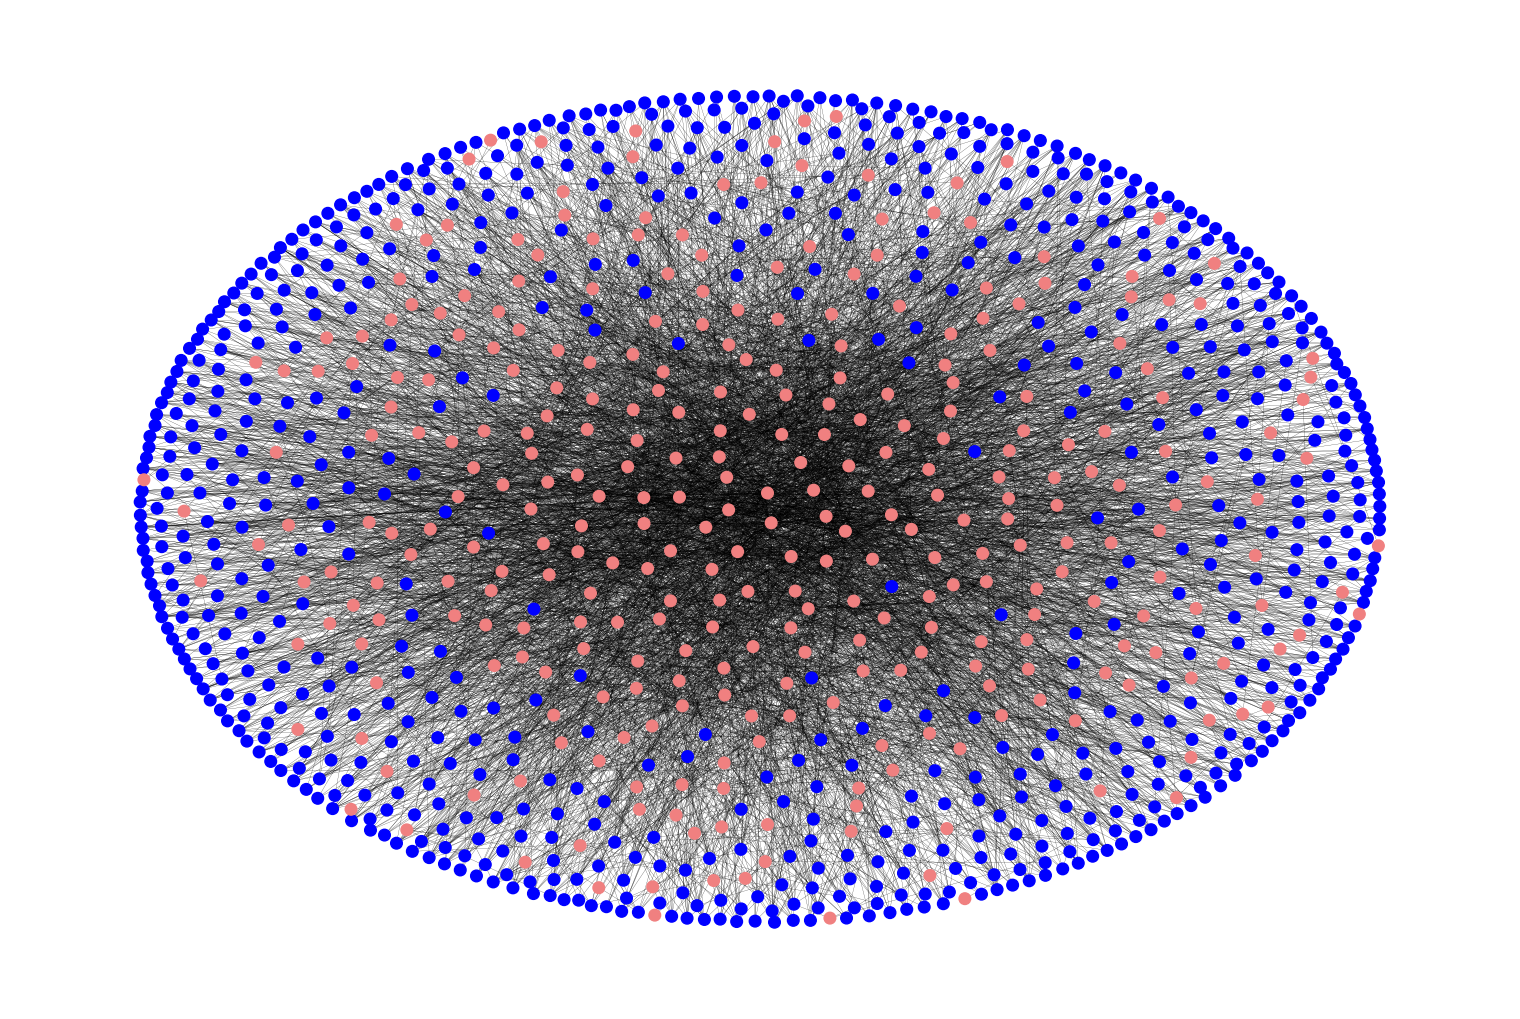

In [2]:
# Get the adjacency matrix from the data
adjacency_matrix = pd.read_csv("../dataset/large_adjacency_matrix.csv", compression='gzip').values

# Remove the last column of the adjacency matrix
adjacency_matrix = adjacency_matrix[:, :-1]

num_rows, num_cols = adjacency_matrix.shape

network = get_graph(adjacency_matrix)

plotGraph(network)

## Check if the network has nodes with no edges

In [3]:
# Get the indices of isolated nodes in each set
isolated_nodes_set1 = np.where(np.sum(adjacency_matrix, axis=1) == 0)[0]
isolated_nodes_set2 = np.where(np.sum(adjacency_matrix, axis=0) == 0)[0]

print("Isolated nodes in Set 1:", isolated_nodes_set1)
print("Isolated nodes in Set 2:", isolated_nodes_set2)

Isolated nodes in Set 1: []
Isolated nodes in Set 2: []


#### Create the Unipartite Projections from the adjacency matrix

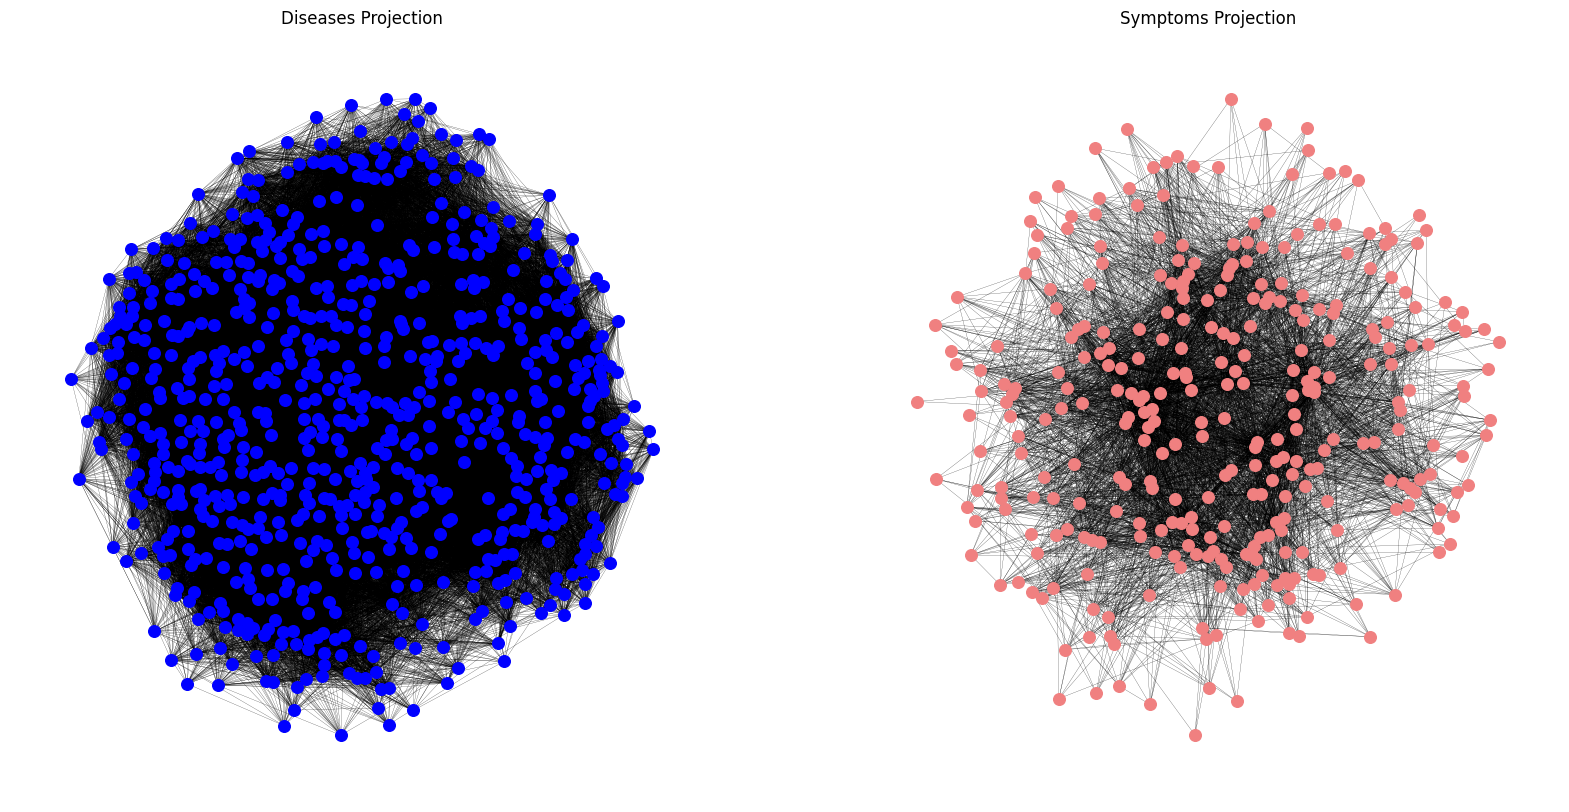

In [4]:
# Create a bipartite graph from the adjacency matrix

graph = get_graph(adjacency_matrix)

# Get the nodes of each partition (diseases and symptoms)
diseases = {n for n, d in graph.nodes(data=True) if d["bipartite"] == 0}
symptoms = set(graph) - diseases

# Create unipartite projections
g_diseases = nx.bipartite.projected_graph(graph, diseases)
g_symptoms = nx.bipartite.projected_graph(graph, symptoms)

# Compute the layout positions of the two unipartite projections
pos = nx.kamada_kawai_layout(graph)

# Draw the unipartite projections (optional)
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title("Diseases Projection")
nx.draw(
    g_diseases,
    pos,
    with_labels=False,
    font_weight="bold",
    node_size=70,  # Adjust the node size
    width=0.15,  # Adjust the edge width
    node_color="blue",
)

plt.subplot(1, 2, 2)
plt.title("Symptoms Projection")
nx.draw(
    g_symptoms,
    pos,
    with_labels=False,
    font_weight="bold",
    node_size=70,  # Adjust the node size
    width=0.15,  # Adjust the edge width
    node_color="lightcoral",
)

plt.show()

---
## 2. Network Analysis

### Degree Distribution: 
see [Hidalgo Haussman Analysis](../code/metrics_analysis/hidalgo_hauss_metrics.ipynb)

### Clustering Coefficient:
see [Clustering Coefficient Analysis](../code/metrics_analysis/clustering_coefficient.ipynb)

### Betweenness Centrality:
see [Betweenness Centrality Analysis](../code/metrics_analysis/betweenness_centrality.ipynb)

### Community Detection:
see [Community Detection Analysis](../code/metrics_analysis/community_detection.ipynb)